In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
players = pd.read_csv('players.csv')

In [3]:
players.head()

date player_name           team       opponent        country  \
0  2020-02-26      Brehze  Evil Geniuses         Liquid  United States   
1  2020-02-26        CeRq  Evil Geniuses         Liquid       Bulgaria   
2  2020-02-26       EliGE         Liquid  Evil Geniuses  United States   
3  2020-02-26       Ethan  Evil Geniuses         Liquid  United States   
4  2020-02-26         NAF         Liquid  Evil Geniuses         Canada   

   player_id  match_id  event_id         event_name  best_of  ...  \
0       9136   2339385      4901  IEM Katowice 2020        3  ...   
1      11219   2339385      4901  IEM Katowice 2020        3  ...   
2       8738   2339385      4901  IEM Katowice 2020        3  ...   
3      10671   2339385      4901  IEM Katowice 2020        3  ...   
4       8520   2339385      4901  IEM Katowice 2020        3  ...   

  m3_kddiff_ct m3_adr_ct m3_kast_ct  m3_rating_ct  m3_kills_t  m3_deaths_t  \
0         -1.0      72.5       80.0          0.93         7.0          9.0   
1          3.0      79.5       53.3          1.12         4.0          8.0   
2          1.0      81.5       63.6          1.03         9.0          9.0   
3          0.0      67.2       66.7          0.97         1.0          9.0   
4         -1.0      72.9       81.8          0.96         8.0          7.0   

   m3_kddiff_t  m3_adr_t  m3_kast_t  m3_rating_t  
0         -2.0      70.4       63.6         0.89  
1         -4.0      40.7       54.5         0.53  
2          0.0      87.9       73.3         1.05  
3         -8.0      14.8       45.5         0.31  
4          1.0      56.3       80.0         0.99  

[5 rows x 101 columns]

In [4]:
players.dropna(inplace=True)

In [5]:
players.drop(['date', 'team', 'opponent', 'country', 'player_id', 'match_id', 'event_id', 'event_name', 'best_of'], axis=1, inplace=True)

In [6]:
players.set_index('player_name', inplace=True)

In [7]:
players

map_1        map_2    map_3  kills  assists  deaths  hs  \
player_name                                                               
Brehze       Overpass         Nuke  Inferno     57       14      61  29   
CeRq         Overpass         Nuke  Inferno     54       10      54  18   
EliGE        Overpass         Nuke  Inferno     55       10      51  28   
Ethan        Overpass         Nuke  Inferno     43        5      54  18   
NAF          Overpass         Nuke  Inferno     52       22      46  23   
...               ...          ...      ...    ...      ...     ...  ..   
RIKO           Mirage  Cobblestone    Train     78       28      73  29   
aproto         Mirage  Cobblestone    Train     69       12      81  39   
dsr            Mirage  Cobblestone    Train     81       16      85  34   
no_one         Mirage  Cobblestone    Train     93       11      74  43   
sayonara       Mirage  Cobblestone    Train     83       16      68  41   

             flash_assists  kast  kddiff  ...  m3_kddiff_ct  m3_adr_ct  \
player_name                               ...                            
Brehze                 0.0  71.1      -4  ...          -1.0       72.5   
CeRq                   4.0  65.1       0  ...           3.0       79.5   
EliGE                  1.0  67.5       4  ...           1.0       81.5   
Ethan                  2.0  65.1     -11  ...           0.0       67.2   
NAF                    9.0  77.1       6  ...          -1.0       72.9   
...                    ...   ...     ...  ...           ...        ...   
RIKO                   0.0  74.5       5  ...           7.0      126.4   
aproto                 0.0  71.7     -12  ...          -2.0       53.7   
dsr                    0.0  66.0      -4  ...          -2.0       60.3   
no_one                 0.0  71.7      19  ...          12.0      120.0   
sayonara               0.0  70.8      15  ...           8.0       94.2   

             m3_kast_ct  m3_rating_ct  m3_kills_t  m3_deaths_t  m3_kddiff_t  \
player_name                                                                   
Brehze             80.0          0.93         7.0          9.0         -2.0   
CeRq               53.3          1.12         4.0          8.0         -4.0   
EliGE              63.6          1.03         9.0          9.0          0.0   
Ethan              66.7          0.97         1.0          9.0         -8.0   
NAF                81.8          0.96         8.0          7.0          1.0   
...                 ...           ...         ...          ...          ...   
RIKO               94.4          1.73        16.0         14.0          2.0   
aproto             88.9          0.90         9.0         16.0         -7.0   
dsr                61.1          0.85         9.0         16.0         -7.0   
no_one             83.3          1.74         9.0         15.0         -6.0   
sayonara           83.3          1.47        14.0         15.0         -1.0   

             m3_adr_t  m3_kast_t  m3_rating_t  
player_name                                    
Brehze           70.4       63.6         0.89  
CeRq             40.7       54.5         0.53  
EliGE            87.9       73.3         1.05  
Ethan            14.8       45.5         0.31  
NAF              56.3       80.0         0.99  
...               ...        ...          ...  
RIKO             83.4       72.2         1.27  
aproto           66.8       55.6         0.74  
dsr              63.5       61.1         0.69  
no_one           64.8       61.1         0.80  
sayonara         67.6       61.1         1.02  

[30560 rows x 91 columns]

In [8]:
cat_feats = ['map_1', 'map_2', 'map_3']

dfs = []

for catft in cat_feats:
    ns = pd.get_dummies(players[catft], drop_first=True)
    dfs.append(ns)
    
training_set = pd.concat([players.drop(cat_feats, axis=1)] + dfs, axis=1)

In [9]:
list(training_set.columns)
o = ['kills', 'kddiff', 'm1_kills', 'm1_kddiff', 'm2_kills', 'm2_kddiff', 'm3_kills', 'm3_kddiff']

# ML Model v2

This time I left the data in its original shape, despite my instincts in the first attempt, and left in all of the specifics about T and CT stats.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(training_set.drop(o, axis=1), training_set['kills'], test_size=0.3, random_state=42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
rfr = RandomForestRegressor()

In [14]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [15]:
rfr_preds = rfr.predict(X_test)

In [17]:
from sklearn import metrics

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_preds))
print('MSE:', metrics.mean_squared_error(y_test, rfr_preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_preds)))

MAE: 0.10767670157068067
MSE: 0.24640565008725993
RMSE: 0.49639263701958747


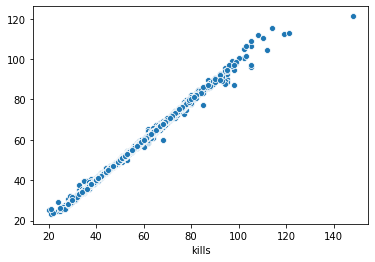

In [19]:
sns.scatterplot(y_test, rfr_preds)

C:\Users\Jacob\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


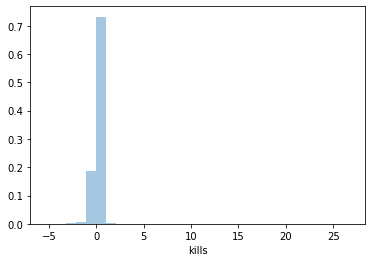

In [21]:
sns.distplot((y_test-rfr_preds), bins=30)

# Model 2 conclusion

This model actually made fewer changes to the data, and left in a lot more redundant columns than the first.

Similar to the housing market project and my removal of the individual 1st floor and 2nd floor square footage, this modification seems to have made the ML model less accurate in my first iteration, as you can tell by the even smaller error metrics on this version: only off by about .5 kills according to RMSE.

In final summary, I once again came up short in preparing my data in a way as to benefit the ML process, but I put a significant amount of time into reshaping the data into a format that was more human-understandable. (The original data was webscraped from a CSGO match info hosting website, so the original format was quite confusing.)